In [12]:
df <- read.delim('../Materials/Binomial_prep.csv', sep=',', header=TRUE)

In [13]:
library(effects)

In [14]:
#Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))
df$Multiple.bill <- as.integer(as.logical(df$Multiple.bill)) 
colnames(df)[1] <- "Collection"
head(df)

Collection,Date,Original.premiere,Directors,Normalised.title,Composer,Multiple.bill,Multiple.bill.1,Season,Occasion,Language,Dutch,German
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,False,1893-1894,N,German,0,1
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,False,1893-1894,N,German,0,1
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,False,1893-1894,N,German,0,1
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,False,1893-1894,N,German,0,1
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,0,False,1893-1894,N,Dutch,1,0
5,1893-10-17,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,False,1893-1894,N,German,0,1


In [15]:
#Make sure that columns are interpreted as factors

df$Collection <- factor(df$Collection, ordered = TRUE)
df$Season <- factor(df$Season, ordered = TRUE)
df$Date <- as.factor(df$Date)
df$Composer <- as.factor(df$Composer)
df$Normalised.title <- as.factor(df$Normalised.title)
df$Original.premiere <- as.factor(df$Original.premiere)
df$Occasion <- as.factor(df$Occasion)
df$Dutch <- as.factor(df$Dutch)
df$German <- as.factor(df$German)
df$Language <- as.factor(df$Language)
df$Directors <- factor(df$Directors, ordered = TRUE)

tail(df)

,Collection,Date,Original.premiere,Directors,Normalised.title,Composer,Multiple.bill,Multiple.bill.1,Season,Occasion,Language,Dutch,German
4436,4435,12/04/1934,1907,Flor Bosmans,Christ'l,Georg Jarno,0,False,1933-1934,N,other,0,0
4437,4436,14/04/1934,1882,Flor Bosmans,Parsifal,Richard Wagner,0,False,1933-1934,N,German,0,1
4438,4437,15/04/1934,1904,Flor Bosmans,Madame Butterfly,Giacomo Puccini,0,False,1933-1934,N,other,0,0
4439,4438,15/04/1934,1916,Flor Bosmans,Driemeisjeshuis,Heinrich BertÃƒÂ©,1,True,1933-1934,N,German,0,1
4440,4439,15/04/1934,1932,Flor Bosmans,Mister Wu,Eugen D'Albert,1,True,1933-1934,N,German,0,1
4441,4440,15/04/1934,1925,Flor Bosmans,Paganini,Franz LehÃƒÂ¡r,1,True,1933-1934,N,German,0,1


In [16]:
str(df)

'data.frame':	4441 obs. of  13 variables:
 $ Collection       : Ord.factor w/ 4441 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Date             : Factor w/ 3383 levels "01/01/1901","01/01/1907",..: 1771 1772 1773 1774 1784 1775 1776 1777 1778 1779 ...
 $ Original.premiere: Factor w/ 108 levels "","?","1608",..: 18 106 18 106 2 18 2 18 2 18 ...
 $ Directors        : Ord.factor w/ 7 levels "Edward Keurvels & Henry Fontaine"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Normalised.title : Factor w/ 328 levels "'T Minnebrugje",..: 111 320 111 320 23 111 23 111 23 111 ...
 $ Composer         : Factor w/ 193 levels "","?","Adolph L'Arronge",..: 36 38 36 38 162 36 162 36 162 36 ...
 $ Multiple.bill    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Multiple.bill.1  : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season           : Ord.factor w/ 38 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Occasion         : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 ...
 $ Language 

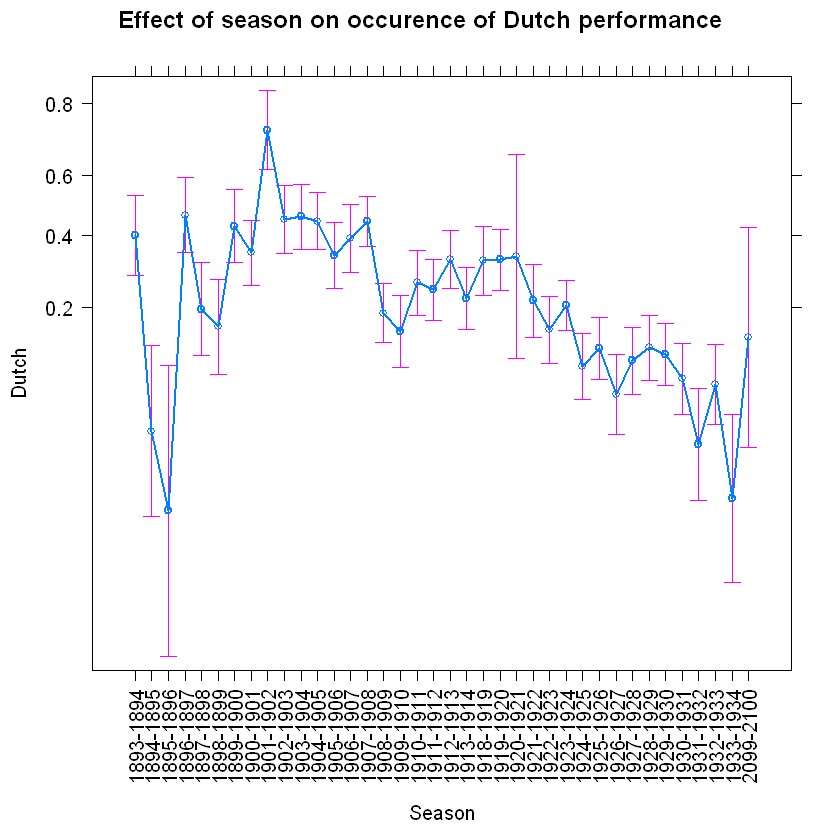

In [55]:
m1 <- glm(Dutch ~ Season, data = df, family = binomial)

plot(effect("Season", m1), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of Dutch performance')

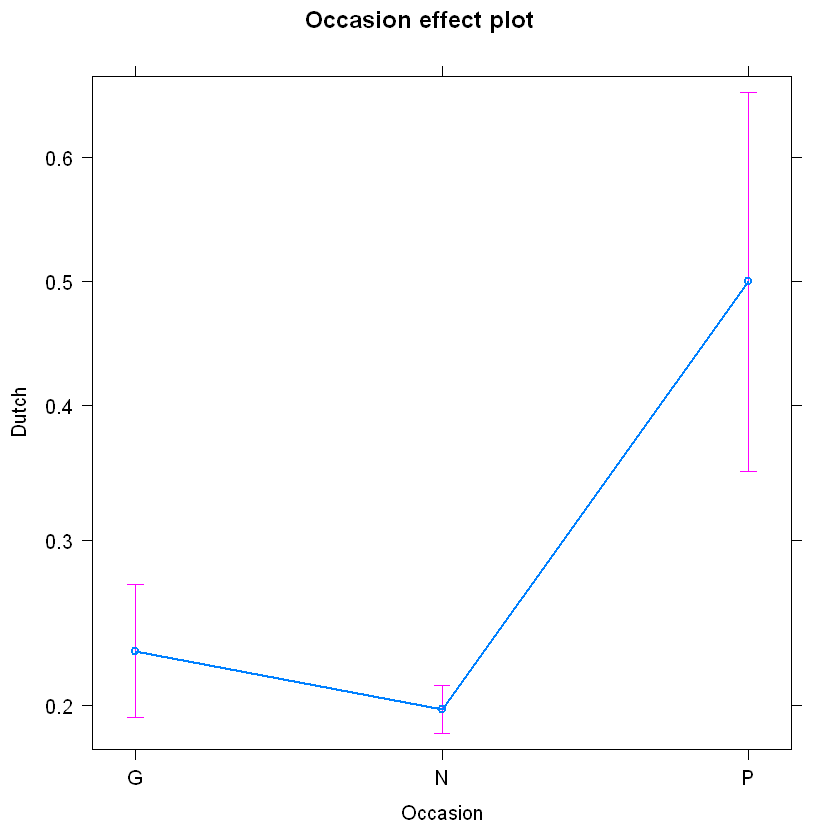

In [21]:
#Model 3: Models the probablity of the type of special occasion given that the production is Dutch

m3 <- glm(Dutch ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", m3))


#Grotere kans dat het een nederlands werk is bij een volksvertoning
#iets grotere kans dat het nederlands is bij een gala vertoning
#minste kans dat het een nederlandse vertoning is bij een 'neutrale' vertoning

#G = gala
#P = popular
#N = neutraal<

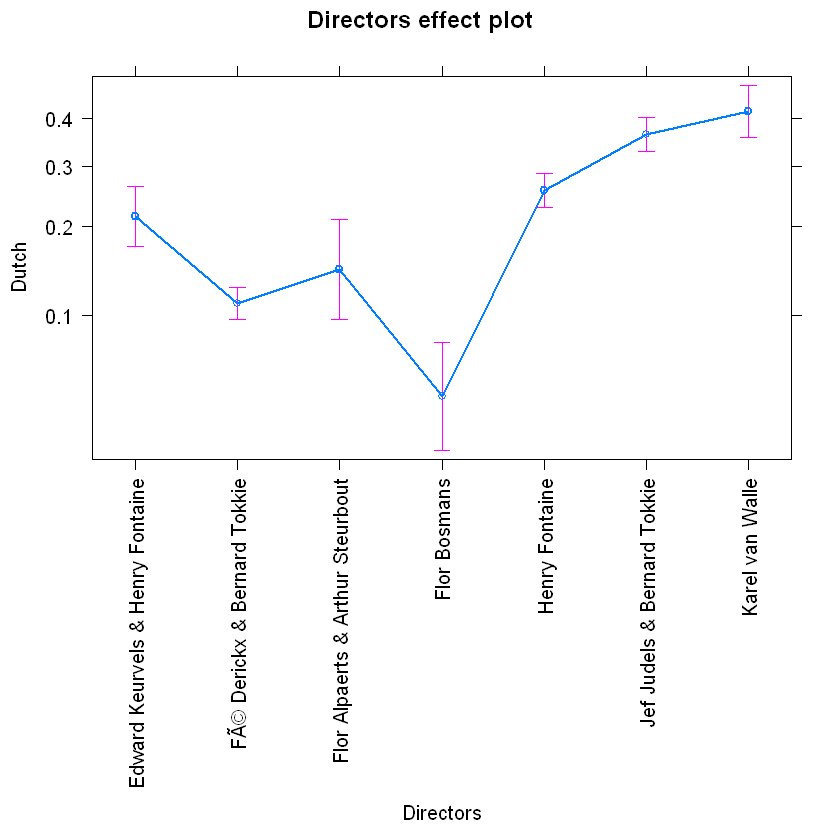

In [23]:
#Model 4: Which director(s) were most probable to produce original Dutch productions.
m4 <- glm(Dutch ~ Directors, data = df, family = binomial)
plot(effect("Directors", m4), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)))



## We try the same but this time with German productions

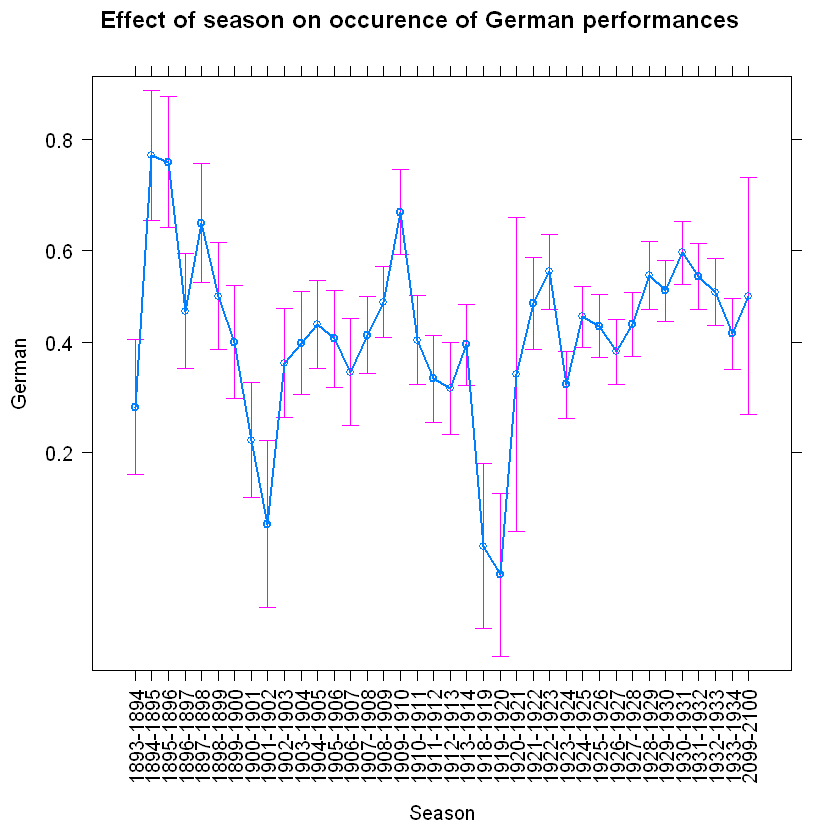

In [34]:
#Model 5: the effect of the Collection on the probability of the outcome "German"
m5_german <- glm(German ~ Season, data = df, family = binomial)

plot(effect("Season", m5_german),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of German performances')

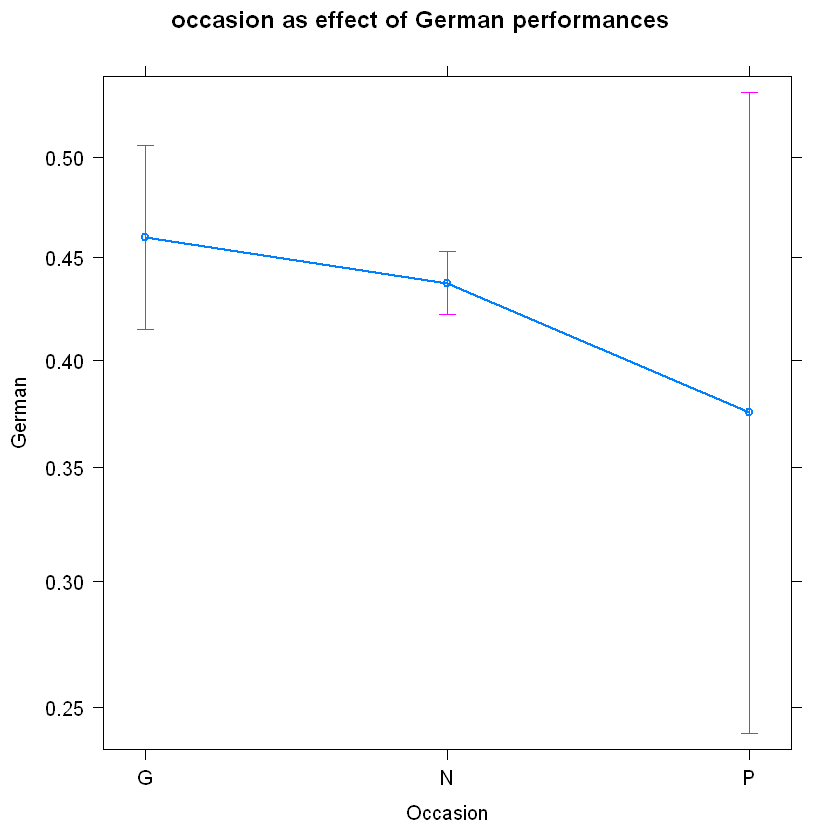

In [35]:
#Model 7: the effect of the special occasion ant the probability of it being a German performance

G7 <- glm(German ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", G7), main = 'occasion as effect of German performances')

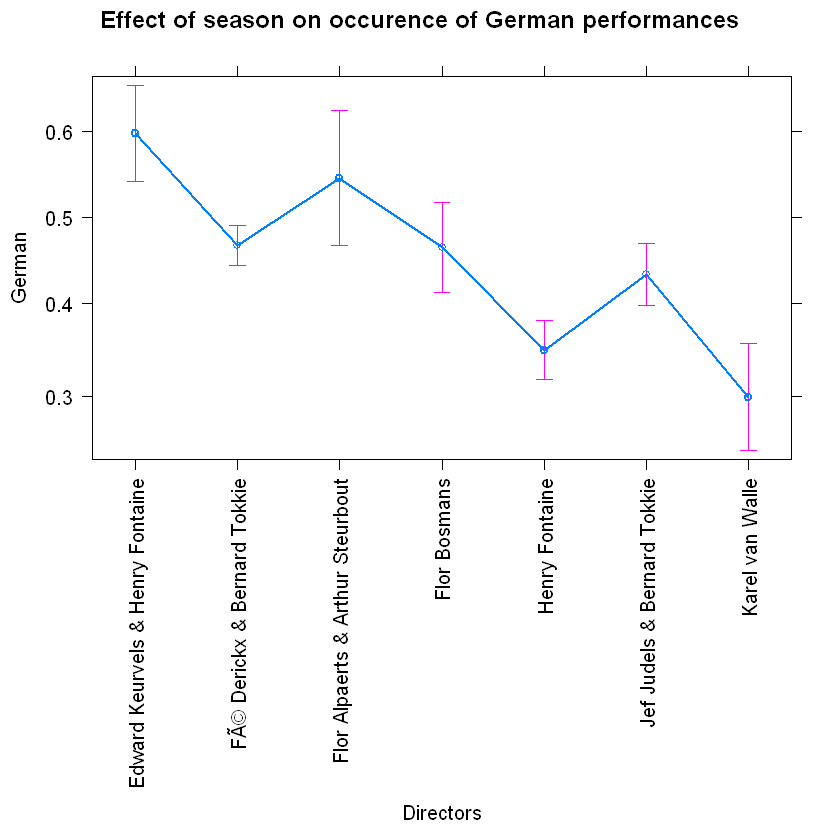

In [37]:
#Model 7: the effect of the Director(s) and the probability of producing a German performances

G_Directors <- glm(German ~ Directors, data = df, family = binomial)
plot(effect("Directors", G_Directors),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Director on occurence of German performances')



## What happens when we delete Wagner from the dataset?

In [38]:
#remove all rows that contain Wagner in the 'Composer column'
df2 <- df[!grepl("Wagner", df$Composer), ]
print(nrow(df))
print(nrow(df2))

[1] 4441
[1] 3744


In [40]:
#Make sure that columns are interpreted as factors

df2$Collection <- factor(df2$Collection, ordered = TRUE)
df2$Season <- factor(df2$Season, ordered = TRUE)
df2$Date <- as.factor(df2$Date)
df2$Composer <- as.factor(df2$Composer)
df2$Normalised.title <- as.factor(df2$Normalised.title)
df2$Original.premiere <- as.factor(df2$Original.premiere)
df2$Occasion <- as.factor(df2$Occasion)
df2$Dutch <- as.factor(df2$Dutch)
df2$German <- as.factor(df2$German)
df2$Language <- as.factor(df2$Language)
df2$Directors <- factor(df2$Directors, ordered = TRUE)

tail(df2)

,Collection,Date,Original.premiere,Directors,Normalised.title,Composer,Multiple.bill,Multiple.bill.1,Season,Occasion,Language,Dutch,German
4435,4434,10/04/1934,?,Flor Bosmans,Josaphat-Park,Arthur Meulemans,1,True,1933-1934,N,other,0,0
4436,4435,12/04/1934,1907,Flor Bosmans,Christ'l,Georg Jarno,0,False,1933-1934,N,other,0,0
4438,4437,15/04/1934,1904,Flor Bosmans,Madame Butterfly,Giacomo Puccini,0,False,1933-1934,N,other,0,0
4439,4438,15/04/1934,1916,Flor Bosmans,Driemeisjeshuis,Heinrich BertÃƒÂ©,1,True,1933-1934,N,German,0,1
4440,4439,15/04/1934,1932,Flor Bosmans,Mister Wu,Eugen D'Albert,1,True,1933-1934,N,German,0,1
4441,4440,15/04/1934,1925,Flor Bosmans,Paganini,Franz LehÃƒÂ¡r,1,True,1933-1934,N,German,0,1


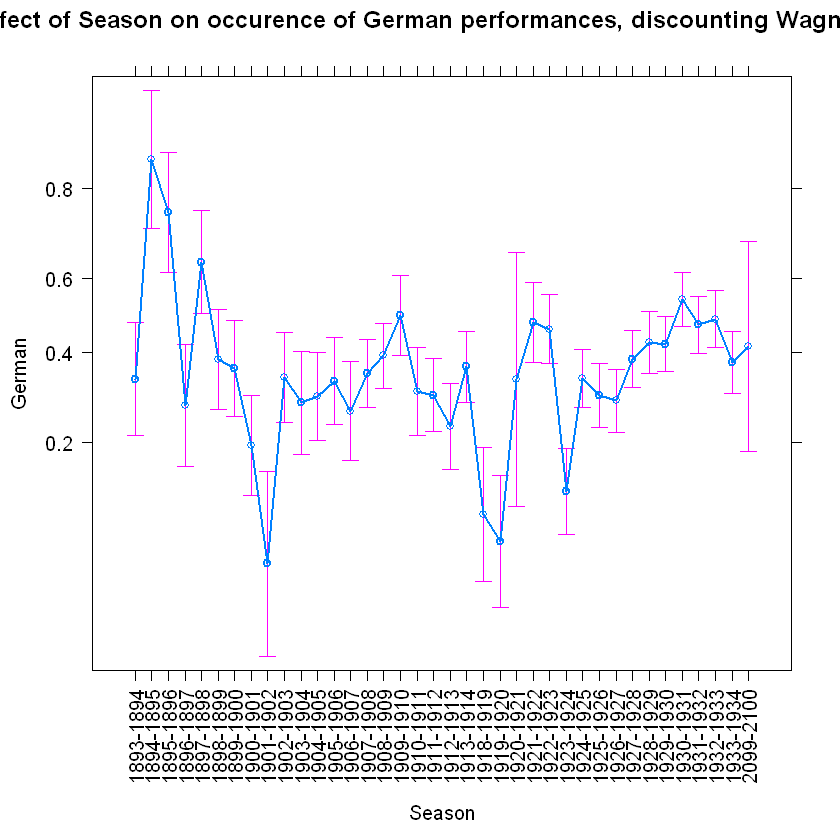

In [42]:
nowag <- glm(German ~ Season, data = df2, family = binomial)


plot(effect("Season", nowag),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performances, discounting Wagner')

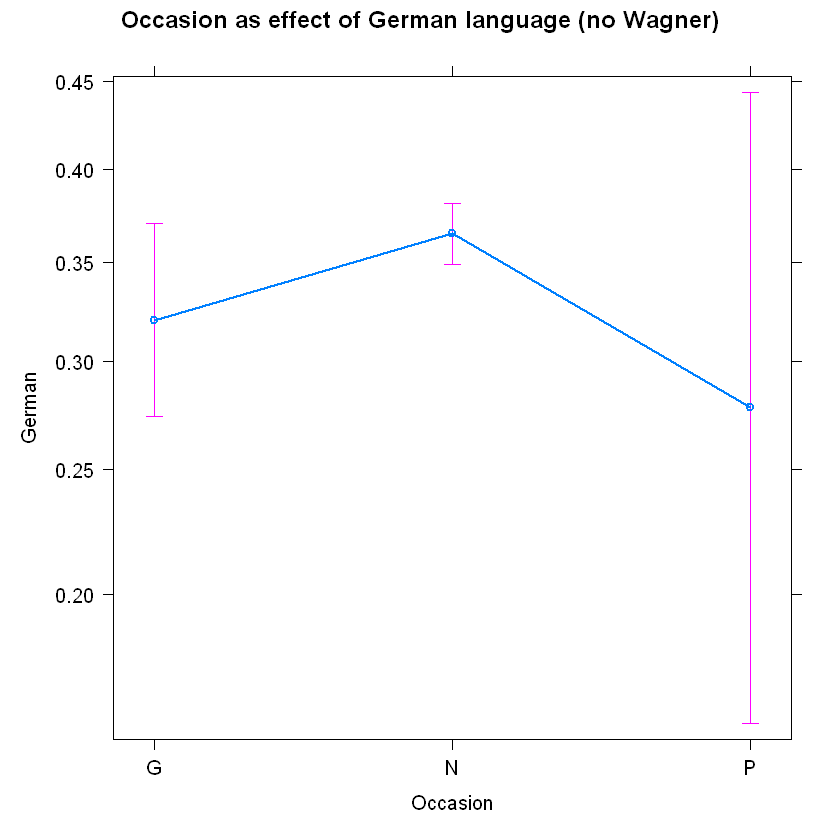

In [148]:
#The German preference for Gala-performances seems to dissapear when taking Wagner out of the equation.
G_occ_nowag <- glm(German ~ Occasion, data = df2, family = binomial)
plot(effect("Occasion", G_occ_nowag), main = 'Occasion as effect of German language (no Wagner)')

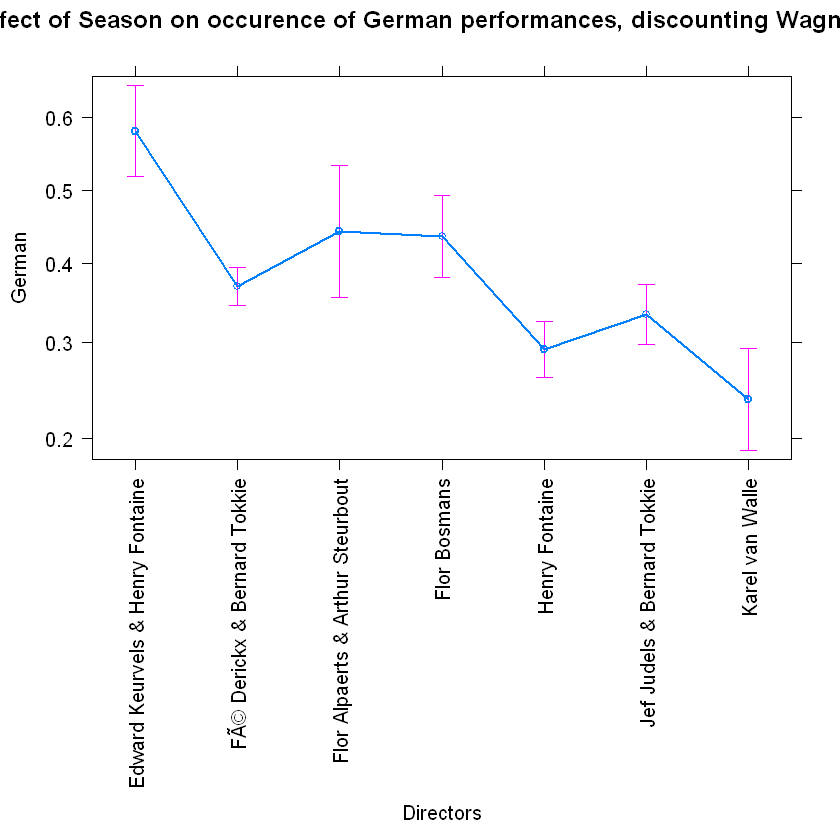

In [45]:
G_Directors_nowag <- glm(German ~ Directors, data = df2, family = binomial)
plot(effect("Directors", G_Directors_nowag),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performances, discounting Wagner')

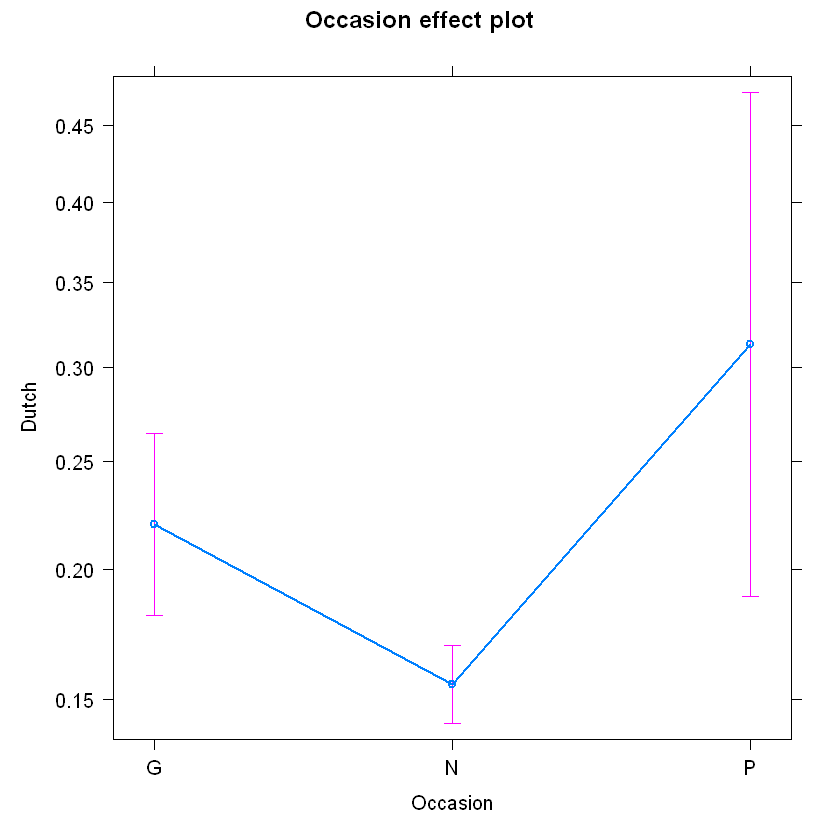

In [162]:
G_Directors <- glm(Dutch ~ Season + Occasion , data = df, family = binomial)
plot(effect("Occasion", G_Directors))

In [209]:
mod <- glm(Dutch ~ Occasion + Multiple.bill + Season + Directors, data = df, family = binomial)
summary(mod)


Call:
glm(formula = Dutch ~ Occasion + Multiple.bill + Season + Directors, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1772  -0.6550  -0.4367  -0.2178   2.9318  

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.11742   14.60563  -0.077    0.939    
OccasionN      -0.60514    0.13484  -4.488 7.19e-06 ***
OccasionP       0.43453    0.38948   1.116    0.265    
Multiple.bill   1.30245    0.09745  13.365  < 2e-16 ***
Season.L       -8.82589  447.38085  -0.020    0.984    
Season.Q       11.02409  390.06439   0.028    0.977    
Season.C      -16.49794  308.62712  -0.053    0.957    
Season^4       14.33466  273.86767   0.052    0.958    
Season^5       -4.60239  159.01929  -0.029    0.977    
Season^6       -4.44852  129.13897  -0.034    0.973    
Season^7       11.26174  241.39740   0.047    0.963    
Season^8      -11.20396  216.52358  -0.052    0

In [210]:
drop1(mod)
#Directors does not improve the model so let's get rid.

,Df,Deviance,AIC
<none>,NA,3711.397,3803.397
Occasion,2,3737.435,3825.435
Multiple.bill,1,3891.357,3981.357
Season,36,3979.331,3999.331
Directors,5,3717.074,3799.074


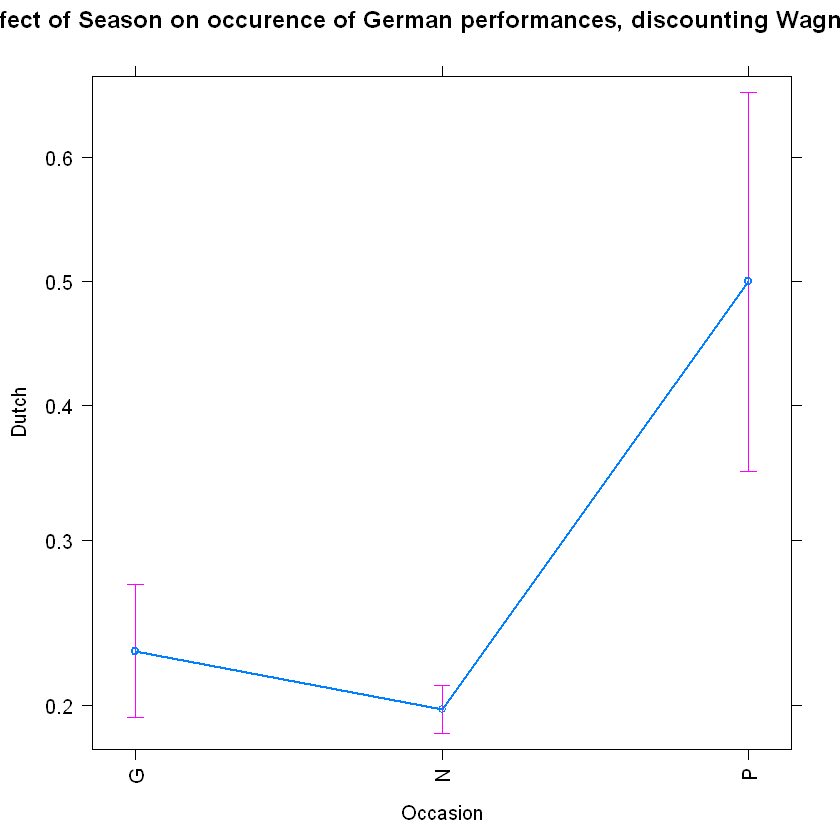

In [51]:
mod <- glm(Dutch ~ Occasion, data = df, family = binomial)

plot(effect("Occasion", mod),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performances, discounting Wagner')

In [48]:
mod2 <- glm(Dutch ~ Occasion + Multiple.bill + Season, data = df, family = binomial)
drop1(mod2)

,Df,Deviance,AIC
<none>,NA,3717.074,3799.074
Occasion,2,3742.595,3820.595
Multiple.bill,1,3898.879,3978.879
Season,37,4302.163,4310.163


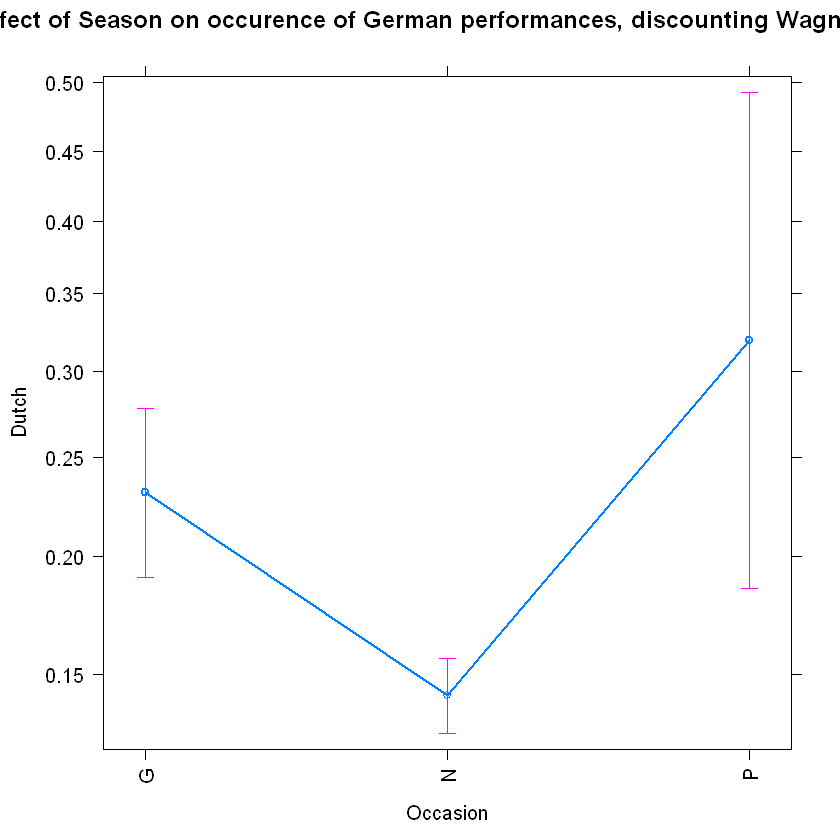

In [52]:
plot(effect("Occasion", mod2),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German performances, discounting Wagner')

In [200]:
model2 <- glm(cbind(Dutch, German) ~ Occasion + Multiple.bill + Season + Directors, data = df, family = binomial)
summary(model2)


Call:
glm(formula = cbind(Dutch, German) ~ Occasion + Multiple.bill + 
    Season + Directors, family = binomial, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.24323  -0.28511  -0.03707   0.26818   1.06465  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.10674    0.10618  -1.005   0.3148    
OccasionN     -0.08783    0.06212  -1.414   0.1574    
OccasionP      0.13049    0.20220   0.645   0.5187    
Multiple.bill  0.34510    0.04803   7.186  6.7e-13 ***
Season.L       0.09391    2.00168   0.047   0.9626    
Season.Q      -0.89436    1.87384  -0.477   0.6332    
Season.C       0.09994    1.54358   0.065   0.9484    
Season^4       0.88725    1.21974   0.727   0.4670    
Season^5      -0.41716    0.67736  -0.616   0.5380    
Season^6       0.43315    0.66771   0.649   0.5165    
Season^7      -0.02593    1.03469  -0.025   0.9800    
Season^8      -0.51521    0.90274 

In [201]:
714.51/4395 <= 1.4

[1] TRUE

In [53]:
drop1(model2, test="LR")

#Multiple bill does help the model so we keep that
#None of the other predictors help the model


ERROR: Error in drop1(model2, test = "LR"): object 'model2' not found


In [204]:
model2 <- glm(cbind(Dutch, German) ~ Multiple.bill, data = df, family = binomial)
summary(model2)


Call:
glm(formula = cbind(Dutch, German) ~ Multiple.bill, family = binomial, 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.65379  -0.36745  -0.05835   0.17827   0.79995  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.25245    0.02106 -11.990  < 2e-16 ***
Multiple.bill  0.33499    0.04475   7.486  7.1e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 876.96  on 4440  degrees of freedom
Residual deviance: 820.85  on 4439  degrees of freedom
AIC: 7653.9

Number of Fisher Scoring iterations: 3


In [206]:
model3 <- glm(cbind(Dutch, German) ~ Occasion * Multiple.bill * Season * Directors, data = df, family = binomial)
summary(model3)

Warning message:
"glm.fit: algorithm did not converge"


Call:
glm(formula = cbind(Dutch, German) ~ Multiple.bill, family = binomial, 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.65379  -0.36745  -0.05835   0.17827   0.79995  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.25245    0.02106 -11.990  < 2e-16 ***
Multiple.bill  0.33499    0.04475   7.486  7.1e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 876.96  on 4440  degrees of freedom
Residual deviance: 820.85  on 4439  degrees of freedom
AIC: 7653.9

Number of Fisher Scoring iterations: 3


ERROR: Error in xy.coords(x, y): 'x' is a list, but does not have components 'x' and 'y'


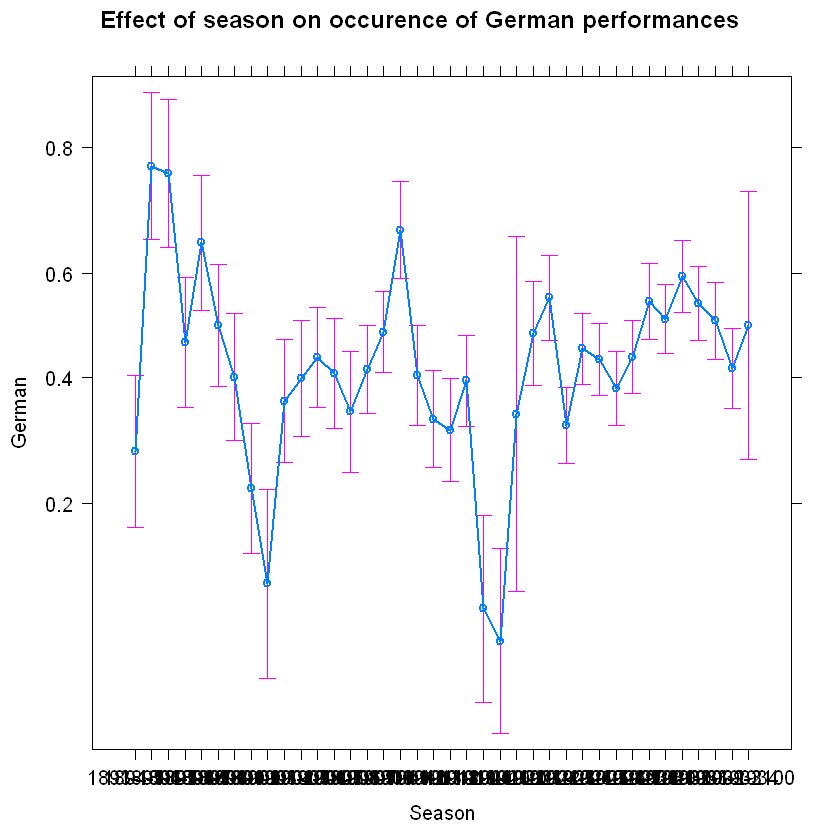

In [35]:
library(effects)

# Fit the two models
m5_german <- glm(German ~ Season, data = df, family = binomial)
m1 <- glm(Dutch ~ Season, data = df, family = binomial)

# Get the effects for each model
eff1 <- effect("Season", m5_german)
eff2 <- effect("Season", m1)

# Plot the first effect
plot(eff1, main = 'Effect of season on occurence of German performances')

# Add the second effect to the plot
lines(eff2)



